In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from nltk import word_tokenize
import string
import re

import warnings
warnings.filterwarnings("ignore")


In [3]:
# import pandas as pd
  
# # Read and store content
# # of an excel file 
# read_file = pd.read_excel ("Copyphishing.xlsx")
  
# # Write the dataframe object
# # into csv file
# read_file.to_csv ("Copyphishing.csv", 
#                   index = None,
#                   header=True)

import pandas as pd
# read_file = pd.read_excel("Copyphishing.xlsx")
# read_file.to_csv("Copyphishing.xlsx", index=None,header =True)
df = pd.read_csv('Copyphishing.csv')
df = df.sample(frac = 1)
df

,Feature,Boolean,Label
4079,"Dear valued PayPal® member , We recently revie...",1.0,True
3209,"Dear member, Due to concerns we have for the s...",1.0,True
6138,Once upon a time Jesse wrote :\n\n Oh yeah I...,0.0,False
3532,"As part of our security measures, we regularly...",1.0,True
3165,eBay sent this message. Your registered name i...,1.0,True
...,...,...,...
867,Your registered name is included to show this ...,1.0,True
4670,URL: http://diveintomark.org/archives/2002/10/...,0.0,False
2083,"Dear Customer, You have one new message at Cap...",1.0,True
4364,URL: http://www.newsisfree.com/click/-4 825931...,0.0,False


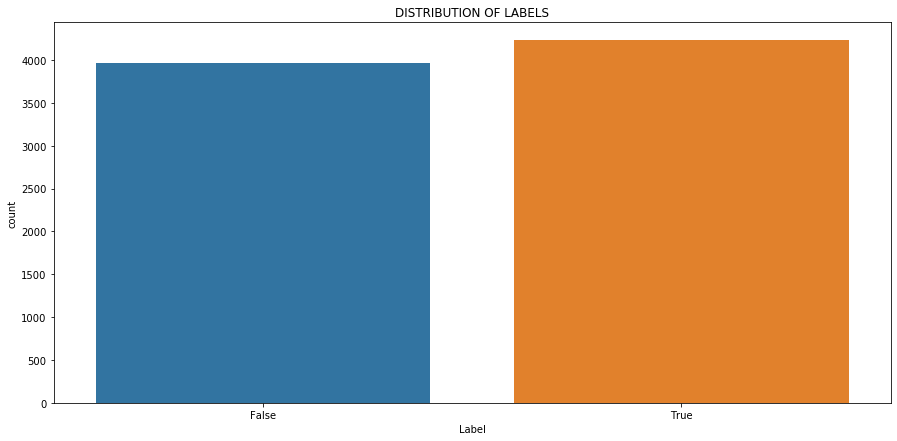

In [4]:
# Let's visualize the Label distiributions using seaborn
plt.figure(figsize=(15,7))
sns.countplot(x='Label',data=df)
plt.title("DISTRIBUTION OF LABELS")
plt.show()

In [5]:
def clean_text(sentence):
    '''
        function to clean content column, make it ready for transformation and modeling
    '''
    #  print(type(sentence))
    sentence = sentence.lower()                #convert text to lower-case
    sentence = re.sub('â€˜','',sentence)    # remove the text â€˜ which appears to occur flequently
    sentence = re.sub('[‘’“”…,]', '', sentence) # remove punctuation
    sentence = re.sub('_', '', sentence) # remove underscore
    sentence = re.sub('[()]', '', sentence)  #remove parentheses
    #sentence = re.sub("[^a-zA-Z]"," ",sentence) #remove numbers and keep text/alphabet only
    sentence = word_tokenize(sentence)      # remove repeated characters (tanzaniaaaaaaaa to tanzania)

    return ' '.join(sentence)

In [6]:
# Applying our clean_text function on contents
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/nitk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
df['Feature'] = df['Feature'].apply(lambda x: str(x))
df['Label'] = df['Label'].apply(lambda x: str(x))
df['Feature'] = df['Feature'].apply(clean_text)
df.head()

,Feature,Boolean,Label
4079,dear valued paypal® member we recently reviewe...,1.0,True
3209,dear member due to concerns we have for the sa...,1.0,True
6138,once upon a time jesse wrote : \n\n oh yeah i ...,0.0,False
3532,as part of our security measures we regularly ...,1.0,True
3165,ebay sent this message . your registered name ...,1.0,True


In [8]:
df['Feature'] = df['Feature'].apply(lambda x: str(x))
df['Label'] = df['Label'].apply(lambda x: str(x))

In [9]:
df = df[['Feature', 'Label']]
SEED = 2020
df_train = df.sample(frac=0.75, random_state=SEED)
df_test = df.drop(df_train.index)
len(df_train), len(df_test)

(6146, 2048)

In [25]:
import ktrain
from ktrain import text

# selecting transformer to use
MODEL_NAME = 'bert-base-uncased'

# Common parameters
MAXLEN  = 128
batch_size = 32
learning_rate = 5e-5
epochs = 10

In [26]:
t = text.Transformer(MODEL_NAME, maxlen = MAXLEN)
trn = t.preprocess_train(df_train.Feature.values, df_train.Label.values)
val = t.preprocess_test(df_test.Feature.values, df_test.Label.values)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=batch_size)
history = learner.fit(learning_rate, epochs)


preprocessing train...
language: en
train sequence lengths:
	mean : 259
	95percentile : 616
	99percentile : 2000


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 260
	95percentile : 617
	99percentile : 1678


Epoch 1/10
193/193 [==============================] - 966s 5s/step - loss: 0.0886 - accuracy: 0.9655 - val_loss: 0.0240 - val_accuracy: 0.9951
Epoch 2/10
193/193 [==============================] - 952s 5s/step - loss: 0.0130 - accuracy: 0.9964 - val_loss: 0.0202 - val_accuracy: 0.9932
Epoch 3/10
193/193 [==============================] - 951s 5s/step - loss: 0.0147 - accuracy: 0.9956 - val_loss: 0.0282 - val_accuracy: 0.9937
Epoch 4/10
193/193 [==============================] - 951s 5s/step - loss: 0.0066 - accuracy: 0.9990 - val_loss: 0.0270 - val_accuracy: 0.9946
Epoch 5/10
193/193 [==============================] - 952s 5s/step - loss: 0.0034 - accuracy: 0.9995 - val_loss: 0.0225 - val_accuracy: 0.9946
Epoch 6/10
193/193 [==============================] - 951s 5s/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0251 - val_accuracy: 0.9951
Epoch 7/10
193/193 [==============================] - 952s 5s/step - loss: 0.0019 - accuracy: 0.9997 - val_loss: 0.0310 - val_accuracy: 0.9941

In [27]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [28]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
xc=range(len(train_loss))

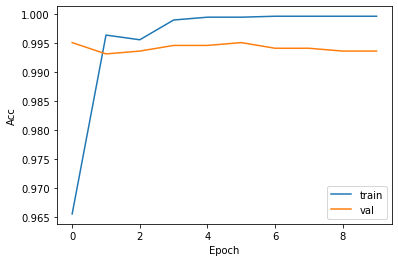

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

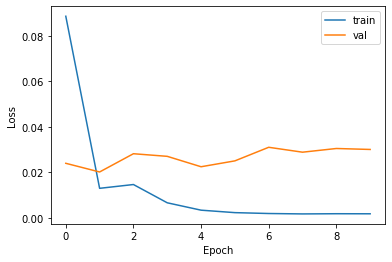

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

In [31]:
model.summary()

Model: "tf_bert_for_sequence_classification_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_113 (Dropout)       multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________


In [32]:
learner.validate(val_data=val, class_names=t.get_classes())

              precision    recall  f1-score   support

       False       1.00      0.99      0.99       994
        True       0.99      1.00      0.99      1054

    accuracy                           0.99      2048
   macro avg       0.99      0.99      0.99      2048
weighted avg       0.99      0.99      0.99      2048



array([[ 984,   10],
       [   3, 1051]])

In [35]:
classifier = ktrain.get_predictor(learner.model, t)

In [36]:
classifier.save('model/transformer_deleted')


In [ ]:
# predictor = ktrain.load_predictor('model/transformer1')

In [ ]:
# classifier = ktrain.get_predictor(learner.model, t)    